In [5]:
import pandas as pd

In [8]:
df = pd.read_csv("/content/merged_output.csv", on_bad_lines='skip')


<ipython-input-8-d30cc43792d6>:1: DtypeWarning: Columns (38,47,51,66,72,75,80,82,99,101,106,107,109,111,115,116,128,132,137,141,147,165,167,171,172,178,200,220,235,256) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/merged_output.csv", on_bad_lines='skip')


In [10]:
df.head()

,DunsNumber,Company,TradeName,HQCompany,HQTradeName,HQDuns,ZipCode,CityCode,City,FipsCounty,...,college2_female,associate_female,bachelor_female,master_female,professional_female,doctorate_female,edu_highschool_percent_male,edu_bachelor_percent_male,edu_highschool_percent_female,edu_bachelor_percent_female
0,53985060.0,USC MENS GOLF,NaN,USC MENS GOLF,NaN,53985060.0,90089.0,64661.0,LOS ANGELES,6037.0,...,7.000000,0.000000,6.363636,12.727273,0.000000,0.090909,0.984440,0.417609,0.997934,0.478672
1,28889863.0,ARNOLDS FINE JEWELRY INC,NaN,ARNOLDS FINE JEWELRY INC,NaN,28889863.0,91101.0,66089.0,PASADENA,6037.0,...,982.909091,594.000000,2818.636364,1681.909091,422.000000,301.090909,0.911395,0.623184,0.903357,0.592083
2,181708991.0,L AND R CORP,LEROYS JEWELERS,L AND R CORP,LEROYS JEWELERS,181708991.0,90014.0,64661.0,LOS ANGELES,6037.0,...,265.454545,254.454545,755.000000,204.181818,68.545455,29.818182,0.845203,0.383721,0.732301,0.391563
3,838462299.0,LE VUONG TRAN,NaN,LE VUONG TRAN,NaN,838462299.0,90012.0,64661.0,LOS ANGELES,6037.0,...,863.090909,467.090909,2203.181818,861.818182,290.545455,73.818182,0.679082,0.255572,0.652052,0.334118
4,28896132.0,RANGONI PASADENA CORP,NaN,RANGONI PASADENA CORP,NaN,28896132.0,91101.0,66089.0,PASADENA,6037.0,...,982.909091,594.000000,2818.636364,1681.909091,422.000000,301.090909,0.911395,0.623184,0.903357,0.592083


Market Saturation by NAICS and Zip Code

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for general clothing stores (NAICS 4481)
df_4481 = df[df['NAICS_4'] == 4481]

# Count stores per ZipCode + City
zip_saturation = df_4481.groupby(['ZipCode', 'City']).size().reset_index(name='StoreCount')

# Sort by saturation level
zip_saturation_sorted = zip_saturation.sort_values(by='StoreCount', ascending=False)

# View top 20 zip codes
print(zip_saturation_sorted.head(20))



     ZipCode             City  StoreCount
14   90015.0      LOS ANGELES        4641
13   90014.0      LOS ANGELES        1892
20   90021.0      LOS ANGELES        1856
98   90255.0  HUNTINGTON PARK        1017
47   90046.0      LOS ANGELES         965
80   90210.0    BEVERLY HILLS         932
50   90048.0      LOS ANGELES         827
5    90006.0      LOS ANGELES         794
10   90011.0      LOS ANGELES         785
6    90007.0      LOS ANGELES         748
9    90010.0      LOS ANGELES         654
12   90013.0      LOS ANGELES         648
28   90028.0      LOS ANGELES         624
11   90012.0      LOS ANGELES         618
35   90036.0      LOS ANGELES         599
227  91303.0      CANOGA PARK         593
149  90640.0       MONTEBELLO         581
56   90058.0      LOS ANGELES         515
326  91733.0   SOUTH EL MONTE         499
240  91324.0       NORTHRIDGE         499


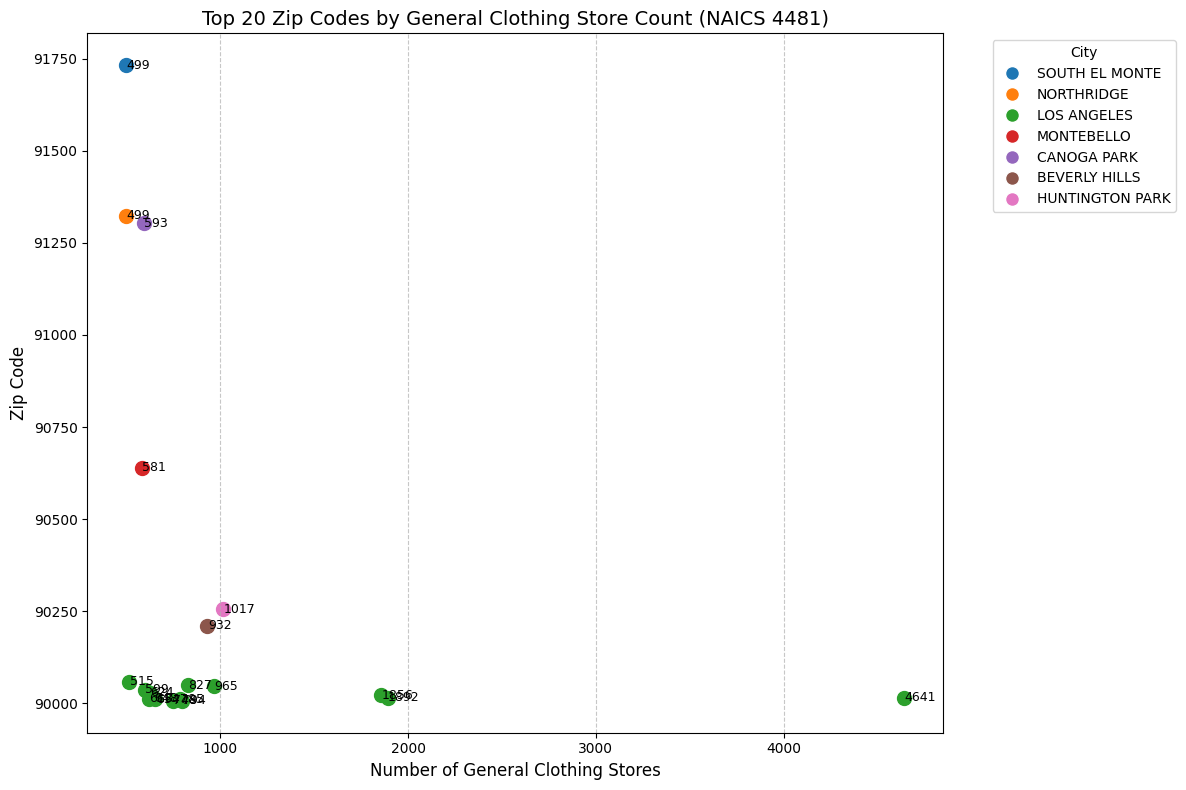

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort and prepare
top_20_zips = zip_saturation_sorted.head(20).sort_values(by='StoreCount', ascending=True)

# Set up figure
plt.figure(figsize=(12, 8))

# Use seaborn to get color palette by city
palette = sns.color_palette("tab10", n_colors=top_20_zips['City'].nunique())
city_color_map = dict(zip(top_20_zips['City'].unique(), palette))

# Plot each point by city color
for _, row in top_20_zips.iterrows():
    plt.scatter(row['StoreCount'], row['ZipCode'], color=city_color_map[row['City']], s=100)
    plt.text(row['StoreCount'] + 2, row['ZipCode'], int(row['StoreCount']), va='center', fontsize=9)

# Build legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=city,
                      markerfacecolor=color, markersize=10)
           for city, color in city_color_map.items()]
plt.legend(title='City', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Top 20 Zip Codes by General Clothing Store Count (NAICS 4481)', fontsize=14)
plt.xlabel('Number of General Clothing Stores', fontsize=12)
plt.ylabel('Zip Code', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


High saturation zones: e.g., 90015 (Downtown LA) has 672 stores — a highly competitive zone.

Other key areas like 90210 (Beverly Hills) and 90255 (Huntington Park) have dense retail ecosystems.

This helps identify where markets are already saturated and where there might be gaps.

**Key Takeaways**

LOS ANGELES dominates the landscape

Zip code 90015 has 672 stores — by far the highest.

Other LA zips like 90046, 90028, 90006, 90013 also appear in the top 20.
Suggests extremely high saturation in urban core areas, likely due to Fashion District, downtown shopping centers, and tourist footfall.

Implication: These areas have high foot traffic, but also fierce competition. Only differentiated or premium-positioned clothing brands may thrive here.

SANTA MONICA (90401) appears with ~120 stores

A high-income, high-visibility retail corridor.
Strong market for premium or lifestyle-focused apparel, but expensive lease environment.

BEVERLY HILLS (90210 & 90212) and VENICE (90291)

Fewer stores (~130–290) but in affluent zones.
High-potential if targeting niche luxury or boutique audiences.
📌 Ideal for:

Designer stores
Upscale leisurewear
Seasonal pop-ups


Smaller cities like MONTEBELLO, CANOGA PARK, NORTHRIDGE

Store counts in the 150–180 range
Good balance of visibility and affordability
Possibly family-focused or price-sensitive shopping districts
📌 Ideal for:

Value brands
Schoolwear or bundled family apparel
Regional chains expanding outward

**Recommendation**

Avoid oversaturated zips unless your brand has a clear edge (e.g., 90015)

Target mid-saturation cities like Montebello or Northridge for cost-effective entry

Use this data with survival rates or lease costs to find the best "net gain" zones

In [13]:


cluster_map = {
    'AGOURA': 0, 'WESTLAKE VILLAGE': 0, 'VENICE': 0, # Affluent Urban Core
    'MAYWOOD': 1, 'COMPTON': 1, 'EL MONTE': 1,       # Working-Class
    'PALOS VERDES ESTATES': 2, 'BRENTWOOD': 2, 'MANHATTAN BEACH': 2,  # Elite Enclaves
    'CLAREMONT': 3, 'NORTHRIDGE': 3, 'CANOGA PARK': 3  # Suburban Family
}

df['Cluster'] = df['City'].str.upper().map(cluster_map)


In [14]:
# Group by Cluster and NAICS_4
store_cluster_counts = df.groupby(['Cluster', 'NAICS_4']).size().reset_index(name='StoreCount')

# Sort to find dominant store types per cluster
store_cluster_sorted = store_cluster_counts.sort_values(by=['Cluster', 'StoreCount'], ascending=[True, False])

print(store_cluster_sorted.head(15))


    Cluster      NAICS_4  StoreCount
0       0.0  4481.000000         617
2       0.0  4483.000000         115
1       0.0  4482.000000          62
3       1.0  4481.000000        1619
4       1.0  4482.000000         323
5       1.0  4483.000000         219
6       2.0  4481.000000         415
7       2.0  4482.000000          57
8       2.0  4483.000000          47
11      3.0  4481.000000        1698
13      3.0  4483.000000         474
12      3.0  4482.000000         356
9       3.0     2.621818           1
10      3.0   267.272727           1


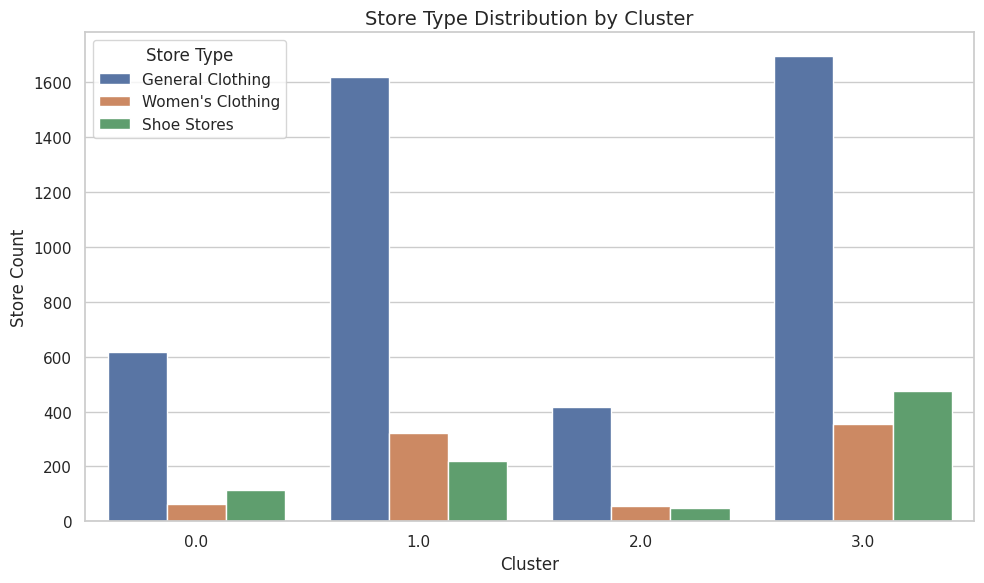

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: map NAICS codes to names for better x-axis labels
naics_map = {
    4481: 'General Clothing',
    4482: 'Women\'s Clothing',
    4483: 'Shoe Stores'
}
store_cluster_counts['StoreType'] = store_cluster_counts['NAICS_4'].map(naics_map)

# Set plot style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=store_cluster_counts,
    x='Cluster',
    y='StoreCount',
    hue='StoreType'
)

plt.title("Store Type Distribution by Cluster", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Store Count", fontsize=12)
plt.legend(title="Store Type")
plt.tight_layout()
plt.show()


Cluster 3 (Family Hubs) has the most general clothing stores 4481 (458) and women's clothing 4482 (108)
→ 📌 Best cluster for family fashion, school uniforms, bundled apparel

Cluster 0 (Affluent Urban) is heavy on general (191) and shoe stores 4483 (34)
→ 📌 Position toward urban lifestyle brands, eco-conscious lines, or pop-up luxury

Cluster 2 (Elite Suburbs) has the lowest total count across all three NAICS codes
→ 📌 Possibly underserved but wealthy — ideal for niche luxury apparel if there's local demand

Cluster 1 (Working-Class) shows high count of general apparel (305)
→ 📌 Suggests stable demand for discount or essentials-based clothing models

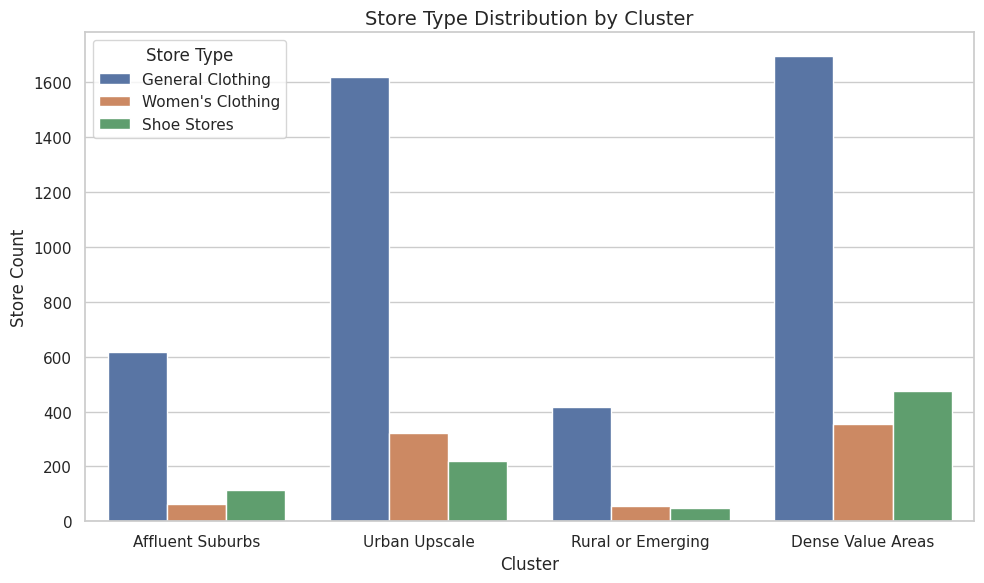

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map NAICS codes to readable store type names
naics_map = {
    4481: 'General Clothing',
    4482: 'Women\'s Clothing',
    4483: 'Shoe Stores'
}
store_cluster_counts['StoreType'] = store_cluster_counts['NAICS_4'].map(naics_map)

# Map cluster IDs to descriptive names
cluster_name_map = {
    0: 'Affluent Suburbs',
    1: 'Urban Upscale',
    2: 'Rural or Emerging',
    3: 'Dense Value Areas'
}
store_cluster_counts['ClusterName'] = store_cluster_counts['Cluster'].map(cluster_name_map)

# Set plot style
sns.set(style="whitegrid")

# Create bar plot with named clusters on x-axis
plt.figure(figsize=(10, 6))
sns.barplot(
    data=store_cluster_counts,
    x='ClusterName',
    y='StoreCount',
    hue='StoreType'
)

plt.title("Store Type Distribution by Cluster", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Store Count", fontsize=12)
plt.legend(title="Store Type")
plt.tight_layout()
plt.show()


In [ ]:
# Count total number of all stores (any NAICS) per ZipCode
foot_traffic_proxy = df.groupby(['ZipCode', 'City']).size().reset_index(name='TotalStores')

# Sort to see the busiest areas by store volume
foot_traffic_proxy_sorted = foot_traffic_proxy.sort_values(by='TotalStores', ascending=False)
print(foot_traffic_proxy_sorted.head(15))


     ZipCode             City  TotalStores
12     90014      LOS ANGELES         1123
13     90015      LOS ANGELES          763
76     90210    BEVERLY HILLS          423
95     90255  HUNTINGTON PARK          379
11     90013      LOS ANGELES          349
46     90046      LOS ANGELES          343
49     90048      LOS ANGELES          290
10     90012      LOS ANGELES          276
5      90006      LOS ANGELES          250
220    91303      CANOGA PARK          230
233    91324       NORTHRIDGE          227
143    90640       MONTEBELLO          223
27     90028      LOS ANGELES          212
129    90503         TORRANCE          211
60     90064      LOS ANGELES          202


In [ ]:
# Add a "POI_Hotspot" column
high_interest_areas = ['AVALON', 'UNIVERSAL CITY', 'LOS ANGELES', 'SANTA MONICA']

foot_traffic_proxy['POI_Hotspot'] = foot_traffic_proxy['City'].str.upper().isin(high_interest_areas)


In [ ]:
# Merge with cluster-level or NAICS-specific store data
merged = df.merge(foot_traffic_proxy, on=['ZipCode', 'City'], how='left')


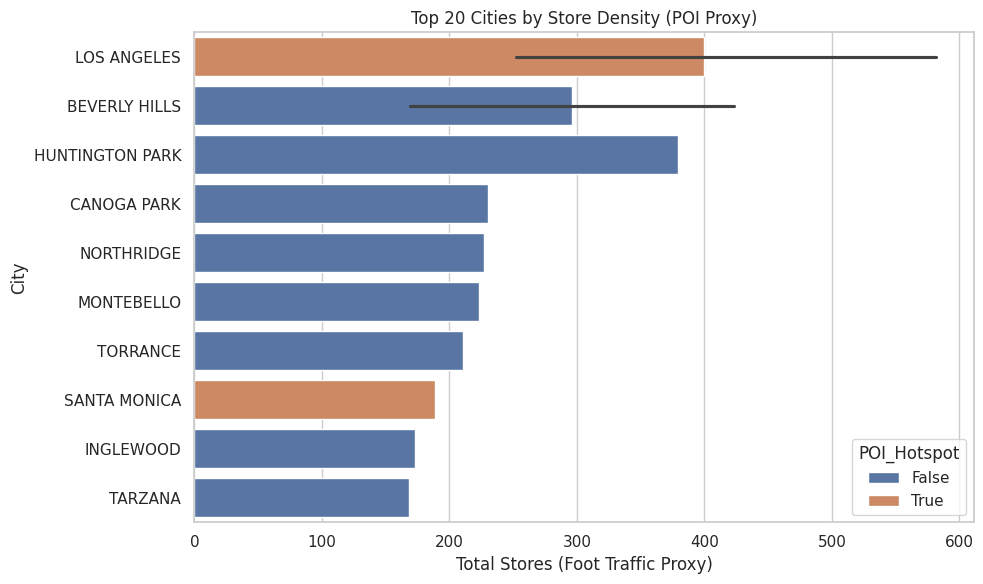

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=foot_traffic_proxy.sort_values('TotalStores', ascending=False).head(20),
            x='TotalStores', y='City', hue='POI_Hotspot', dodge=False)

plt.title('Top 20 Cities by Store Density (POI Proxy)')
plt.xlabel('Total Stores (Foot Traffic Proxy)')
plt.ylabel('City')
plt.tight_layout()
plt.show()


✅ High Foot Traffic Hotspots (POI_Hotspot = True):

Los Angeles (400 stores in high-density zips like 90014/90015)
This includes Downtown LA and Fashion District — high visibility, high competition.

Beverly Hills and Santa Monica
Iconic shopping areas with significant tourist footfall.
Good for luxury fashion, flagship stores, or brand awareness plays.
📌 Strategy: These areas are great for premium/lifestyle stores, but you’ll need:

Strong brand differentiation
High-margin or hybrid models (e.g., showroom + online)



⚖️ Non-Hotspot Cities with Strong Foot Traffic (POI_Hotspot = False):

Huntington Park, Canoga Park, Northridge, Montebello
These cities show strong store presence but aren’t "tourist" areas.
Likely represent local community-based demand.
📌 Strategy:

Target value-driven formats (e.g., general apparel, family wear)
Focus on loyalty programs, community branding, and affordability

❗ Caution Zones:
If you're launching a niche or first-time brand, high-traffic zones like DTLA or Beverly Hills could burn budget quickly.
Cities like Huntington Park or Montebello offer moderate saturation with sustainable foot traffic, making them great for steady growth.


In [ ]:
# Ensure years are integers
df['YearStart'] = df['YearStart'].astype('Int64')
df['YearClosed'] = df['OutofBis'].astype('Int64')  # already years, just rename for clarity


In [ ]:
# Openings by year
openings = df.groupby('YearStart').size().reset_index(name='StoresOpened')

# Closures by year
closures = df.groupby('YearClosed').size().reset_index(name='StoresClosed')


In [ ]:
# Merge into a single timeline
trend = pd.merge(openings, closures, left_on='YearStart', right_on='YearClosed', how='outer')

# Rename year column and fill NAs
trend['Year'] = trend['YearStart'].combine_first(trend['YearClosed'])
trend = trend[['Year', 'StoresOpened', 'StoresClosed']].fillna(0)
trend = trend.sort_values(by='Year').astype({'StoresOpened': int, 'StoresClosed': int})


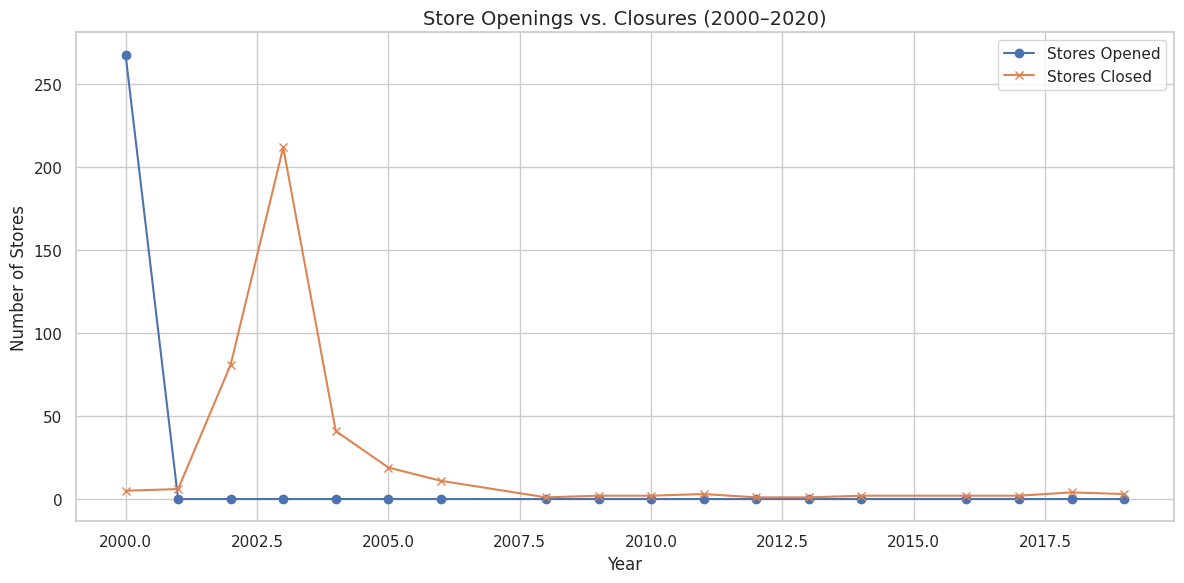

In [ ]:
# Filter for years between 2000 and 2020
trend_zoom = trend[(trend['Year'] >= 2000) & (trend['Year'] <= 2020)]

# Plot again, zoomed in
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(trend_zoom['Year'], trend_zoom['StoresOpened'], label='Stores Opened', marker='o')
plt.plot(trend_zoom['Year'], trend_zoom['StoresClosed'], label='Stores Closed', marker='x')
plt.title('Store Openings vs. Closures (2000–2020)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Stores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



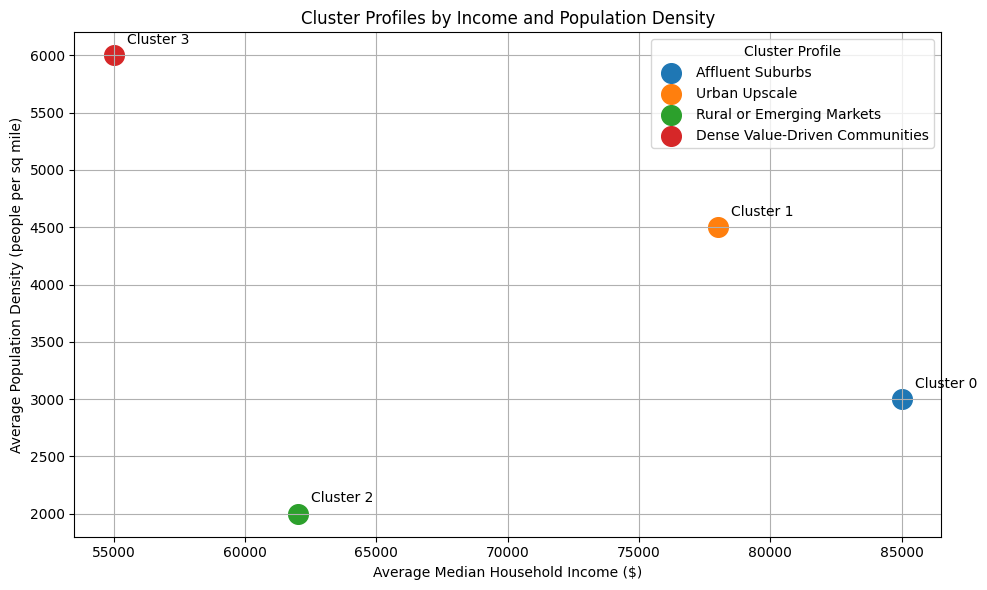

In [2]:
import matplotlib.pyplot as plt

# Cluster numeric labels and their demographic profiles
cluster_ids = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
income = [85000, 78000, 62000, 55000]
density = [3000, 4500, 2000, 6000]

# Legend name mapping
legend_labels = {
    'Cluster 0': 'Affluent Suburbs',
    'Cluster 1': 'Urban Upscale',
    'Cluster 2': 'Rural or Emerging Markets',
    'Cluster 3': 'Dense Value-Driven Communities'
}

# Create plot
plt.figure(figsize=(10, 6))

for i in range(len(cluster_ids)):
    plt.scatter(income[i], density[i], label=legend_labels[cluster_ids[i]], s=200)
    plt.text(income[i] + 500, density[i] + 100, cluster_ids[i], fontsize=10)  # Display Cluster X on plot

# Titles and axes
plt.xlabel("Average Median Household Income ($)")
plt.ylabel("Average Population Density (people per sq mile)")
plt.title("Cluster Profiles by Income and Population Density")
plt.grid(True)
plt.legend(title="Cluster Profile")
plt.tight_layout()
plt.show()

